In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("weather_data.csv")
data

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Cool,Normal,Weak,Yes
4,Rain,Cool,Normal,Strong,No
5,Sunny,Mild,High,Weak,No
6,Sunny,Cool,Normal,Weak,Yes
7,Rain,Mild,Normal,Weak,Yes
8,Sunny,Mild,Normal,Strong,Yes
9,Overcast,Mild,High,Strong,Yes


In [4]:
data.isnull().sum()

Outlook        0
Temperature    0
Humidity       0
Wind           0
Play           0
dtype: int64

In [5]:
data.dtypes

Outlook        object
Temperature    object
Humidity       object
Wind           object
Play           object
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   Play         14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [7]:
#data = data.replace("High", 1)
#data = data.replace("Normal", 0)
data['Humidity'] = data['Humidity'].replace(['High', 'Normal'], [1, 0])
data

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,1,Weak,No
1,Sunny,Hot,1,Strong,No
2,Overcast,Hot,1,Weak,Yes
3,Rain,Cool,0,Weak,Yes
4,Rain,Cool,0,Strong,No
5,Sunny,Mild,1,Weak,No
6,Sunny,Cool,0,Weak,Yes
7,Rain,Mild,0,Weak,Yes
8,Sunny,Mild,0,Strong,Yes
9,Overcast,Mild,1,Strong,Yes


In [8]:
data = data.replace("Hot", 0)
data = data.replace("Mild", 1)
data = data.replace("Cool", 2)

In [9]:
data = data.replace("Sunny", 0)
data = data.replace("Overcast", 1)
data = data.replace("Rain", 2)

In [10]:
data = data.replace("Strong", 1)
data = data.replace("Weak", 0)

In [11]:
data

,Outlook,Temperature,Humidity,Wind,Play
0,0,0,1,0,No
1,0,0,1,1,No
2,1,0,1,0,Yes
3,2,2,0,0,Yes
4,2,2,0,1,No
5,0,1,1,0,No
6,0,2,0,0,Yes
7,2,1,0,0,Yes
8,0,1,0,1,Yes
9,1,1,1,1,Yes


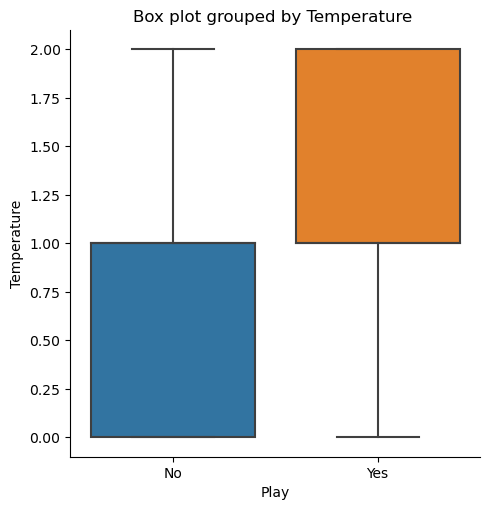

In [12]:
sns.catplot(x="Play",y="Temperature",kind="box",data=data)   
plt.title("Box plot grouped by Temperature ")
plt.show()

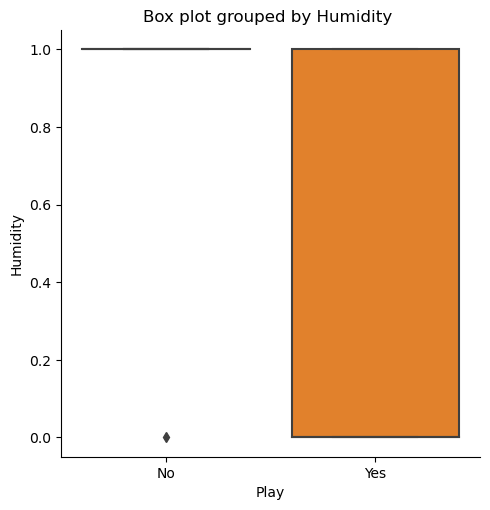

In [13]:
sns.catplot(x="Play",y="Humidity",kind="box",data=data)   
plt.title("Box plot grouped by Humidity ")
plt.show()

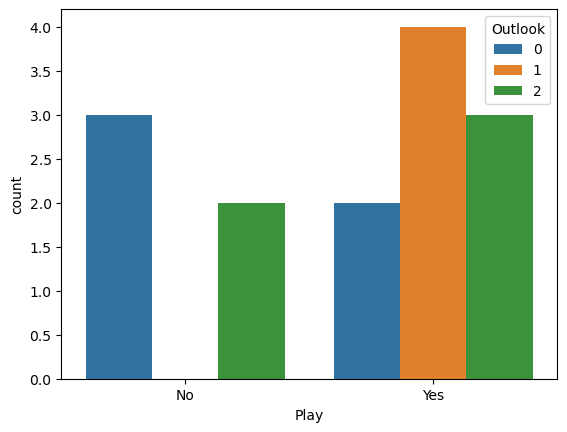

In [14]:
sns.countplot(x="Play",hue="Outlook",data=data)
xlabel='Play'
ylabel='count'
plt.show()

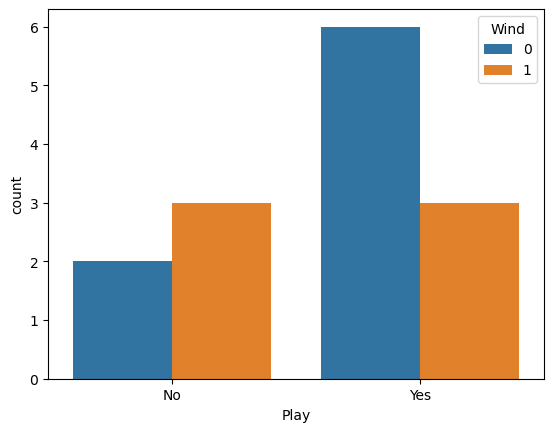

In [15]:
sns.countplot(x="Play",hue="Wind",data=data)
xlabel='Play'
ylabel='count'
plt.show()

In [16]:
X=data[["Outlook","Temperature","Humidity","Wind"]].values

In [17]:
X

array([[0, 0, 1, 0],
       [0, 0, 1, 1],
       [1, 0, 1, 0],
       [2, 2, 0, 0],
       [2, 2, 0, 1],
       [0, 1, 1, 0],
       [0, 2, 0, 0],
       [2, 1, 0, 0],
       [0, 1, 0, 1],
       [1, 1, 1, 1],
       [1, 0, 0, 0],
       [2, 1, 1, 1],
       [1, 2, 0, 1],
       [2, 1, 1, 0]], dtype=int64)

In [18]:
Y=data['Play']

In [19]:
Y

0      No
1      No
2     Yes
3     Yes
4      No
5      No
6     Yes
7     Yes
8     Yes
9     Yes
10    Yes
11     No
12    Yes
13    Yes
Name: Play, dtype: object

## train_test_split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

## DecisionTreeClassifier

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
model=DecisionTreeClassifier()

In [24]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [25]:
y_predict = model.predict(X_test)

In [26]:
y_predict

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes'], dtype=object)

In [27]:
data_new = pd.DataFrame({'Actual':Y_test,'Predicted':y_predict})

In [28]:
data_new

,Actual,Predicted
11,No,Yes
2,Yes,Yes
4,No,Yes
7,Yes,Yes
5,No,Yes


## Accuracy using Decision Tree

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy =accuracy_score(Y_test,y_predict)*100

In [31]:
accuracy

40.0

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
performance = confusion_matrix(Y_test,y_predict)

In [34]:
performance

array([[0, 3],
       [0, 2]], dtype=int64)

In [35]:
from sklearn.metrics import plot_confusion_matrix

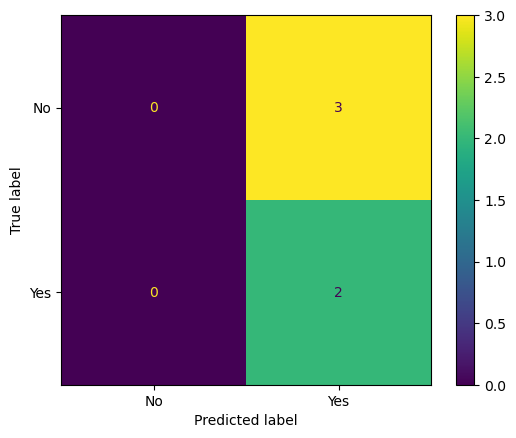

In [36]:
plot_confusion_matrix(model,X_test,Y_test)
plt.show()

In [37]:
from sklearn.metrics import classification_report

In [38]:
report =classification_report(Y_test,y_predict)

In [39]:
print(report)

              precision    recall  f1-score   support

          No       0.00      0.00      0.00         3
         Yes       0.40      1.00      0.57         2

    accuracy                           0.40         5
   macro avg       0.20      0.50      0.29         5
weighted avg       0.16      0.40      0.23         5



In [40]:
data.columns

Index(['Outlook', 'Temperature', 'Humidity', 'Wind', 'Play'], dtype='object')

## Tree

In [41]:
from sklearn import tree

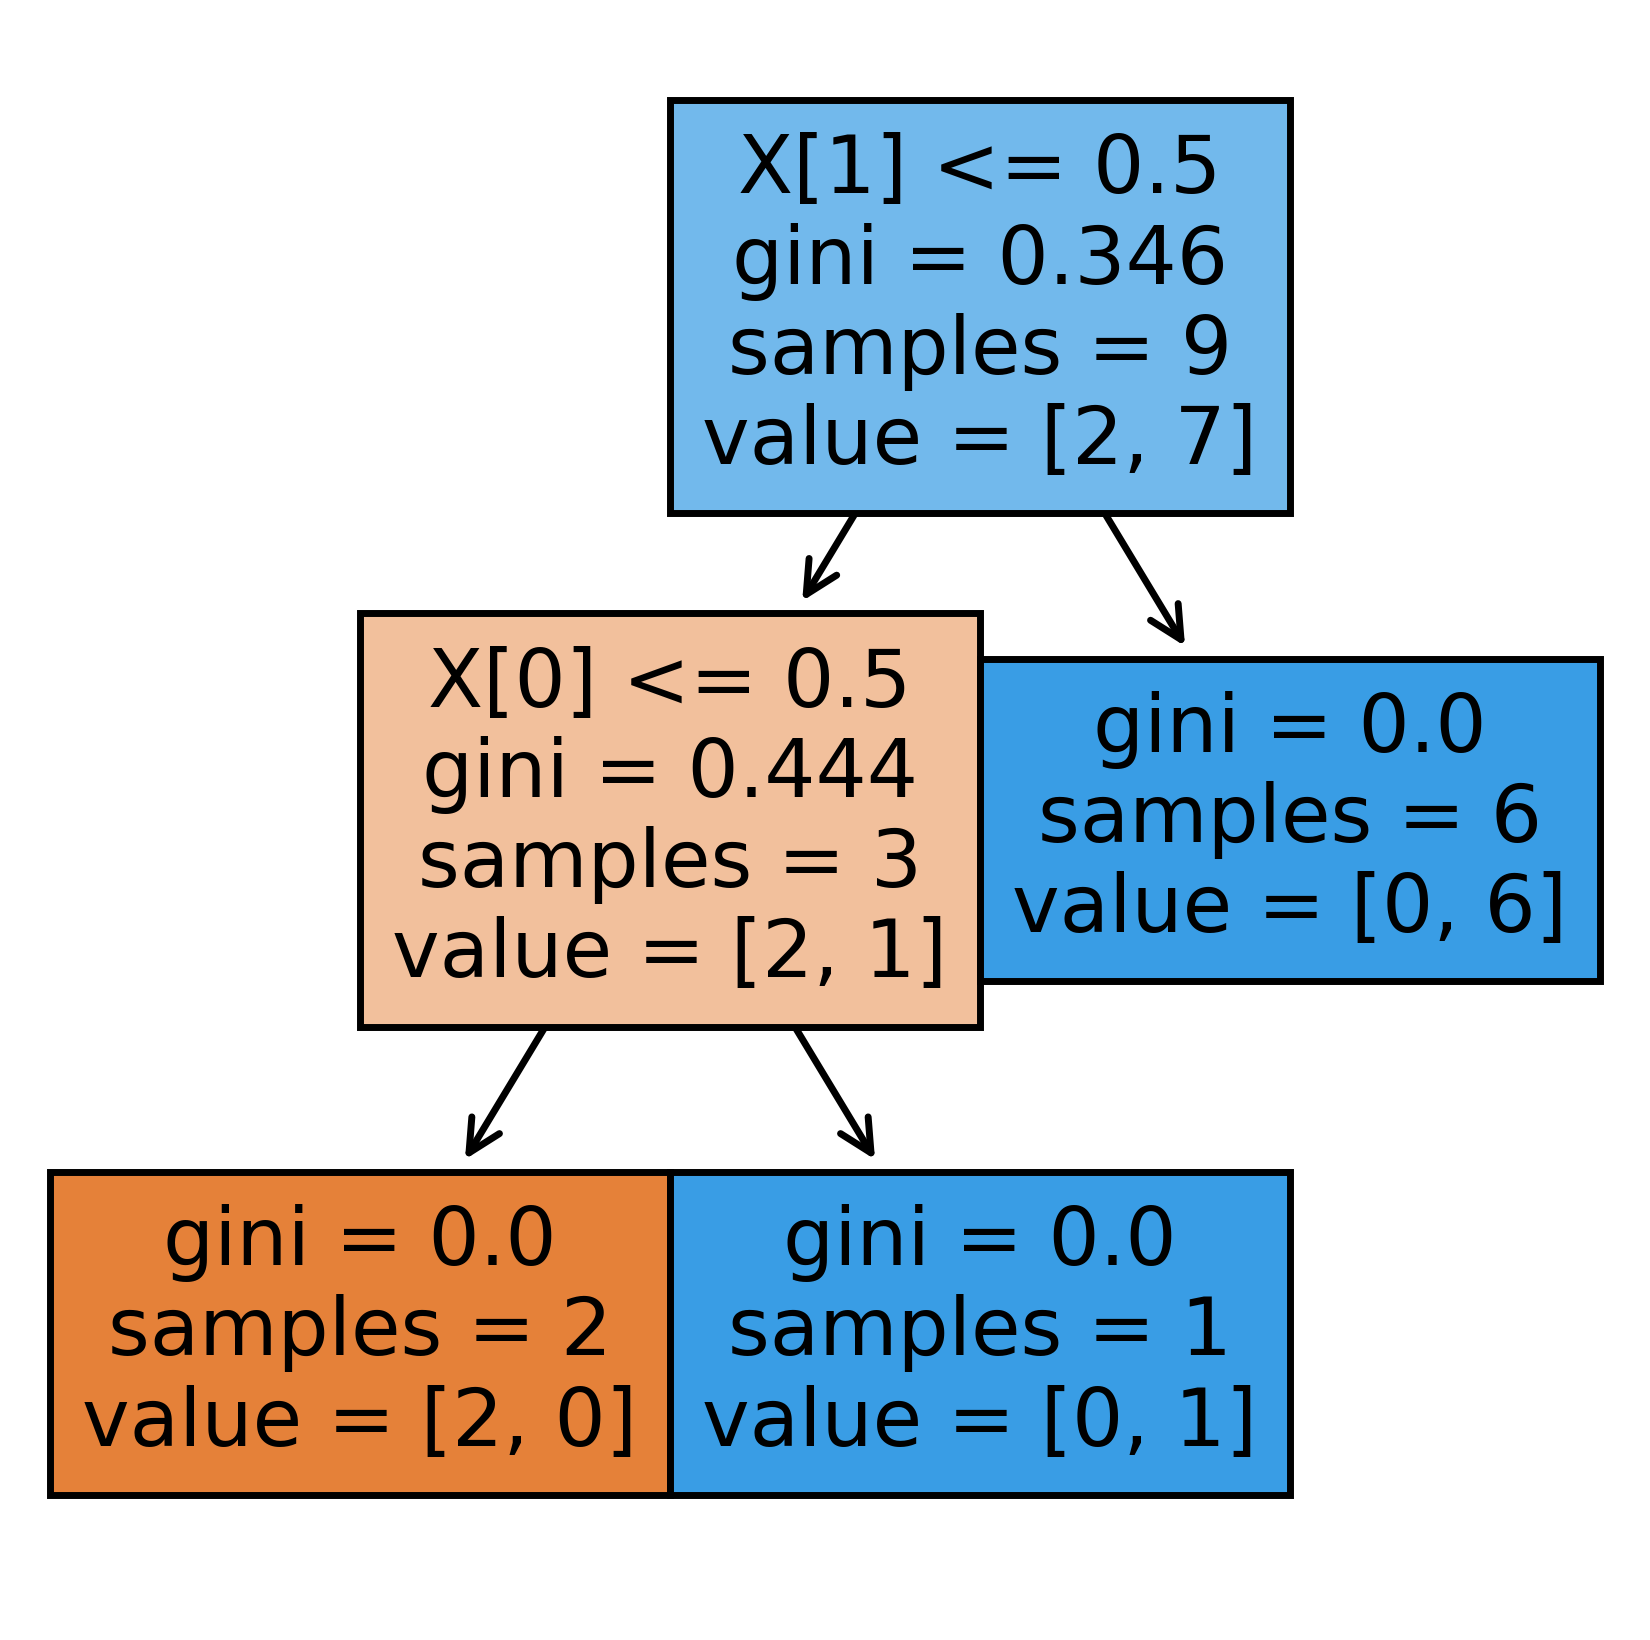

In [42]:
fig,ax =plt.subplots(nrows=1, ncols=1, figsize=(4,4),dpi=500)
#plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)
plt.show()

In [43]:
model=DecisionTreeClassifier(criterion="entropy")

In [44]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

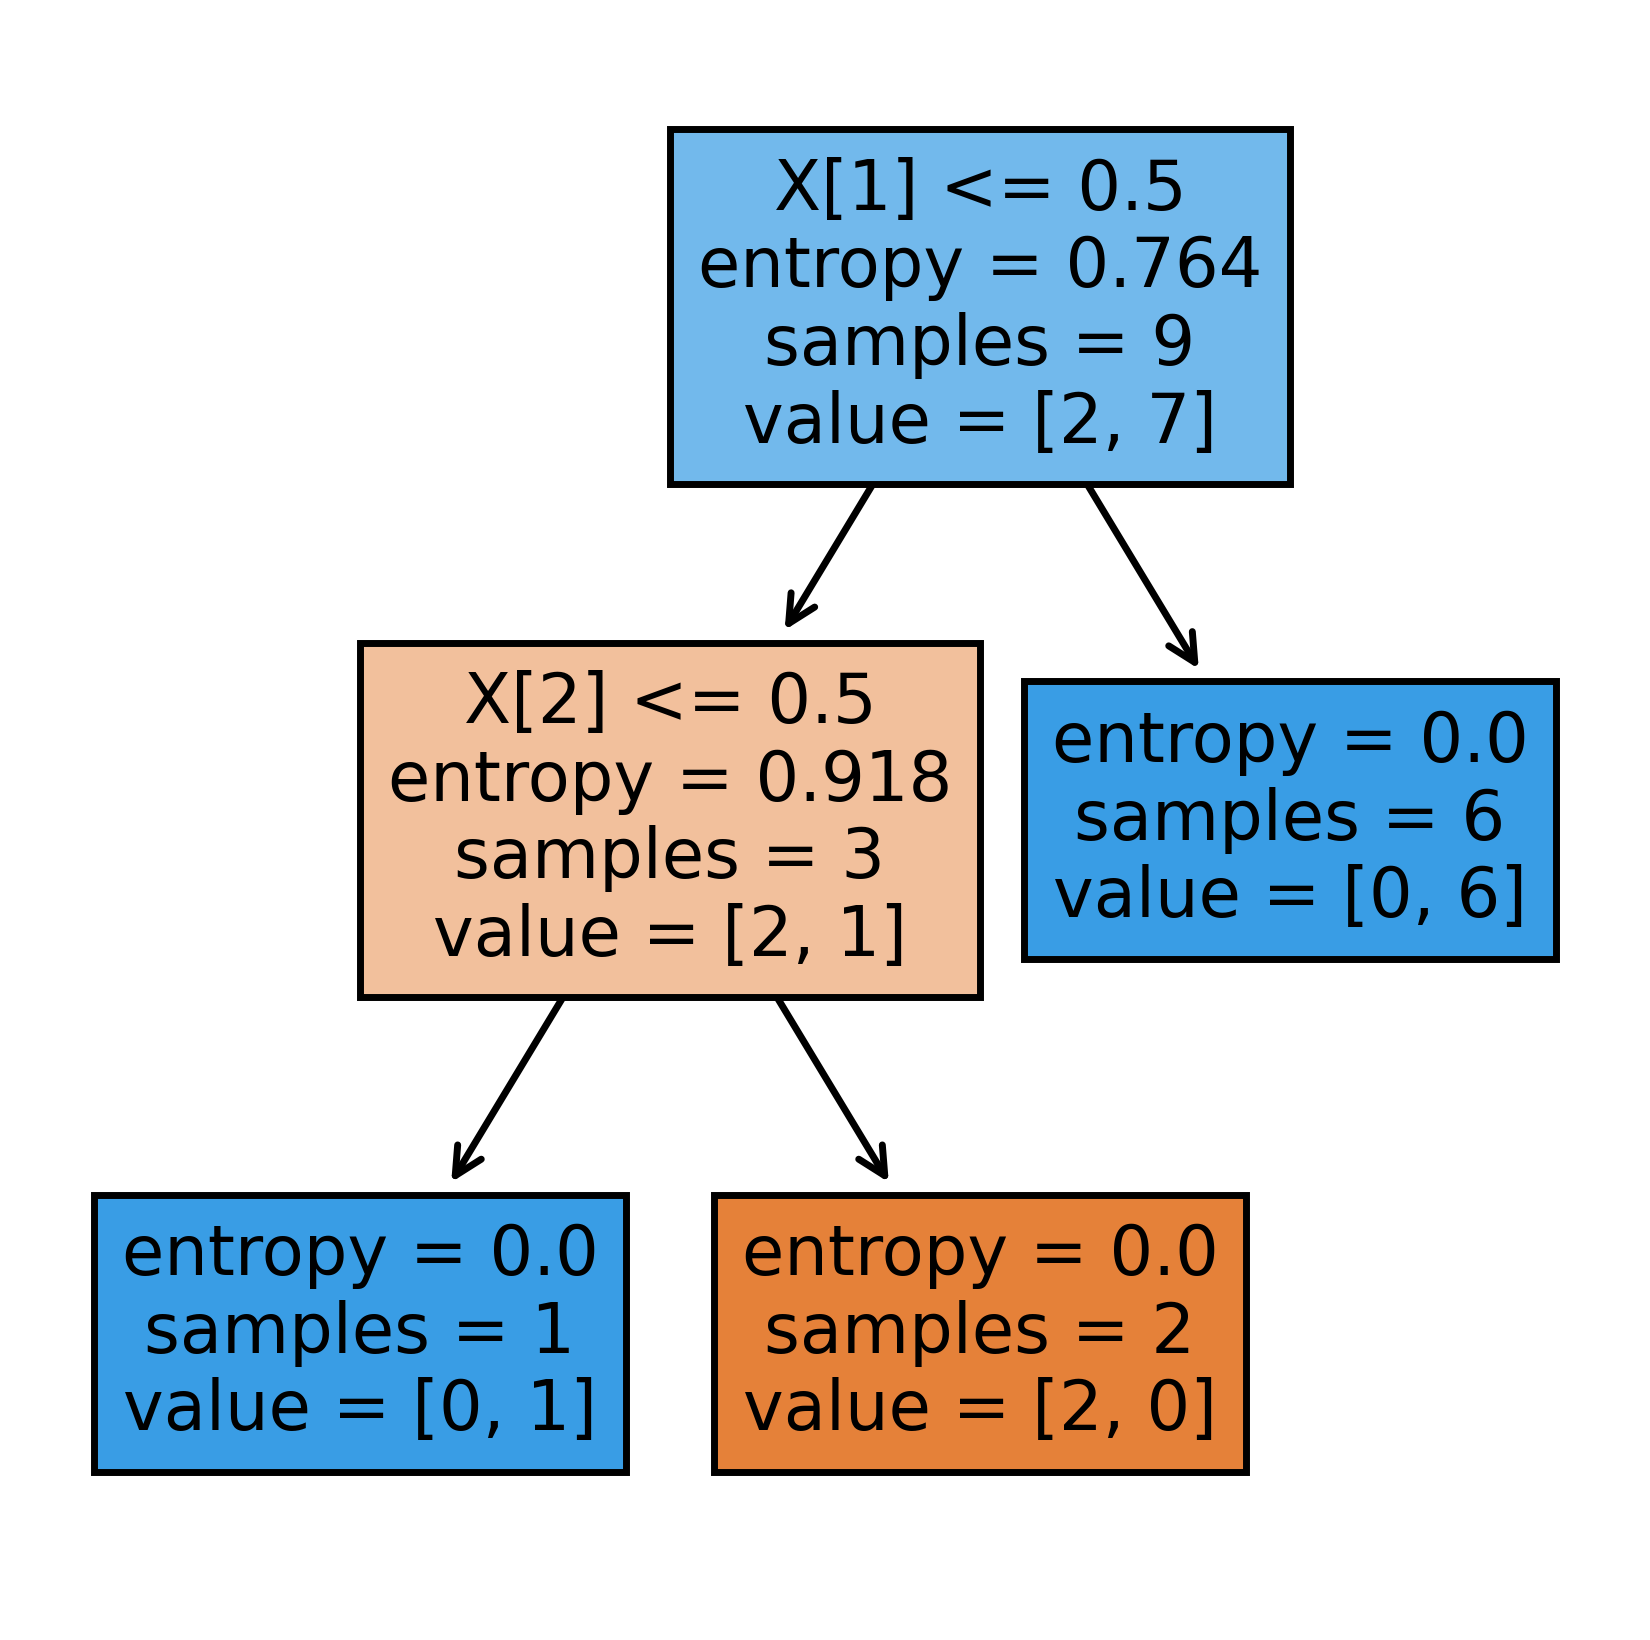

In [45]:
fig,ax =plt.subplots(nrows=1, ncols=1, figsize=(4,4),dpi=500)
#plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)
plt.show()

## LogisticRegression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
model=LogisticRegression()

In [48]:
model.fit(X_train,Y_train)

LogisticRegression()

In [49]:
y_pred=model.predict(X_test)

In [50]:
y_pred

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes'], dtype=object)

In [51]:
model.predict([[0,1,1,1]])

array(['Yes'], dtype=object)

In [52]:
model.score(X_test,Y_test)*100

40.0

In [53]:
from sklearn.metrics import classification_report 

In [54]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

          No       0.00      0.00      0.00         3
         Yes       0.40      1.00      0.57         2

    accuracy                           0.40         5
   macro avg       0.20      0.50      0.29         5
weighted avg       0.16      0.40      0.23         5



### Accuracy using LogisticRegression

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(Y_test, y_pred)*100

40.0